# Shallow Learning by Big Brain Team

#### Execute basic setup, copy pasted from deep atlas course content

In [1]:
import sys
import os
sys.path.insert(0, os.path.join("..", "includes"))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()

🎉 Running in a Virtual environment


In [2]:
if deep_atlas.environment == 'VIRTUAL':
    !pipenv install ipykernel==6.28.0
    !pipenv install scikit-learn==1.4.1.post1 pandas==2.2.1 matplotlib==3.8.3 umap-learn
if deep_atlas.environment == 'COLAB':
    %pip install scikit-learn==1.4.1.post1 pandas==2.2.1 matplotlib==3.8.3


zsh:1: command not found: pipenv
zsh:1: command not found: pipenv


Set up imports! We consolidated imports here for readability.

In [5]:
# Data loading
import random
from sklearn.datasets import fetch_20newsgroups_vectorized

# Creating training/testing sets
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Dimensionality reduction
import umap

# Evaluation
from sklearn.metrics import accuracy_score
import time

# Inspecting data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Suppress scientific notation in printed output

np.set_printoptions(suppress=True)

#### Load the data

In [6]:
training = fetch_20newsgroups_vectorized(subset="train")
test = fetch_20newsgroups_vectorized(subset="test")

Now that the data is loaded, use notebooks to display the basic shape.

In [7]:
training

{'data': <11314x130107 sparse matrix of type '<class 'numpy.float64'>'
 	with 1787565 stored elements in Compressed Sparse Row format>,
 'target': array([17,  7, 10, ..., 14, 12, 11]),
 'frame': None,
 'target_names': ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 'feature_names': array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
       dtype=object),
 'DESCR': '.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand

Look at a single vector

In [8]:
training['data'][0]


<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 340 stored elements in Compressed Sparse Row format>

Get vector & feature count

In [10]:
num_vectors = training['data'].shape[0]
print(f"There are {num_vectors} vectors in the data.")

num_features = training['data'].shape[1]
print(f"There are {num_features} features in the data.")

There are 11314 vectors in the data.
There are 130107 features in the data.


Log the data

## Use UMAP to Reduce the dimensionality to be able to plot it

In this section, we use UMAP to reduce the dimensionality of the data and cluster outputs for the purposes of visualization in 2D.


<details>
  <summary>UMAP Description</summary>

UMAP is a dimension reduction technique that is particularly effective for visualizing clusters or groups of data points and their relative proximities. It's primary advantage over t-SNE is that it preserves more of the global structure.

It's based on manifold learning techniques and mathematics including Riemannian geometry and algebraic topology.

> In the context of UMAP and other dimensionality reduction techniques, a manifold refers to a shape or structure in high-dimensional space that can be approximated as a lower-dimensional space locally.
>
> For example, consider a piece of paper: it's a 2D object living in our 3D world. If you crumple that piece of paper into a ball, it's still a 2D surface, but now it's embedded in 3D space in a complex way. That crumpled piece of paper is an example of a 2D manifold in 3D space.
>
> In the case of UMAP, it assumes that the high-dimensional data lies on a manifold, and it tries to learn the structure of this manifold. It then uses this learned structure to project the data into a lower-dimensional space in a way that preserves as much of the original data structure as possible. This is why UMAP is particularly good at preserving both local and global structures in the data.

UMAP is particularly effective in scenarios where:

1. You want to preserve the global structure of the data while reducing dimensions.
1. You are dealing with very large datasets. UMAP is faster than t-SNE, making it more suitable for larger datasets.
1. You want more consistent results. Unlike t-SNE, which can produce different results with different runs due to its randomness, UMAP tends to produce more consistent results.

Limitations

1. **Complexity**: UMAP is based on some complex mathematical concepts, which can make it harder to reason about than PCA or t-SNE.
2. **Hyperparameters**: Like t-SNE, UMAP also has a few key hyperparameters (like the number of neighbors and the minimum distance) that can significantly affect the resulting visualization. It might require some trial and error to find the best settings.
3. **No Inverse Mapping**: Similar to t-SNE, UMAP does not provide an explicit function to map new, unseen data into the same space. However, recent versions of UMAP have added some support for this feature.
4. **Assumptions**: UMAP makes some assumptions about the data, such as it being uniformly distributed on a Riemannian manifold. If these assumptions are not met, the results may not be meaningful.

</details>


In [18]:
# Model 130107-dimensional data as 2-dimensional data
X_umap = umap.UMAP(min_dist=0.3, random_state=42).fit_transform(training.data)

/Users/nrog/.local/share/virtualenvs/BigBrainTeam-ySEiIZqy/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Note: the warning in the section above is related to the inclusion a "seed". This "seed" ensures that subsequent executions have the same random inputs which results in identical output and the same visualization.

Define a function to plot the 2 dimensions:

In [14]:
def plot_embedding(data, y, title):
    # `data` is a 2D array of shape (n_samples, 2)
    # `y` is a 1D array of shape (n_samples,), representing the labels

    fig = plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        # Value of data in the first dimension
        data[:, 0],
        # Value of data in the second dimension
        data[:, 1],
        # Color of each point, representing the label
        c=y.astype(int),
        # Use a categorical color map with 10 distinct colors
        cmap="tab20",
        # size of each point
        s=1,
    )
    # Add a color bar to the right of the plot
    plt.colorbar(scatter)

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.show()

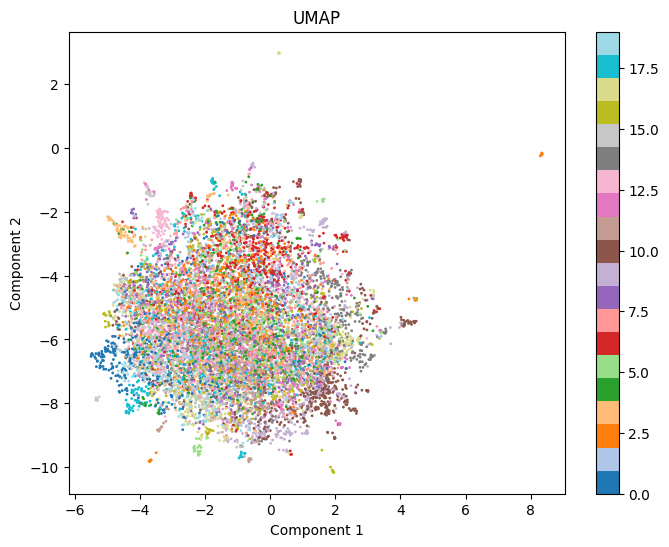

In [15]:
# Plot the UMAP projection
plot_embedding(X_umap, training.target, title="UMAP")

# Do some 3d plotting to get a better idea of the data

Define a function for 3d plotting. Reconfigure UMAP to reduce dimensionality to three features for 3D visualizations of clusters.

In [19]:
# Model 130107-dimensional data as 3-dimensional data
X_umap_3d = umap.UMAP(n_components=3, min_dist=0.3).fit_transform(training.data)

Note the lack of random seed here, subsequent visualization will vary slightly. Our output is persisted in this notebook below.

In [20]:
def plot_embedding_3d(data, y, title):
    # `data` is a 3D array of shape (n_samples, 2)
    # `y` is a 1D array of shape (n_samples,), representing the labels

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection="3d")
    scatter = ax.scatter(
        # Value of data in the first dimension
        data[:, 0],
        # Value of data in the second dimension
        data[:, 1],
        # Value of data in the third dimension
        data[:, 2],
        # Color of each point, representing the label
        c=y.astype(int),
        # Use a categorical color map with 10 distinct colors
        cmap="tab10",
        # Size of each point
        s=1,
    )

    # Add a color bar to the right of the plot
    plt.colorbar(scatter)

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.show()

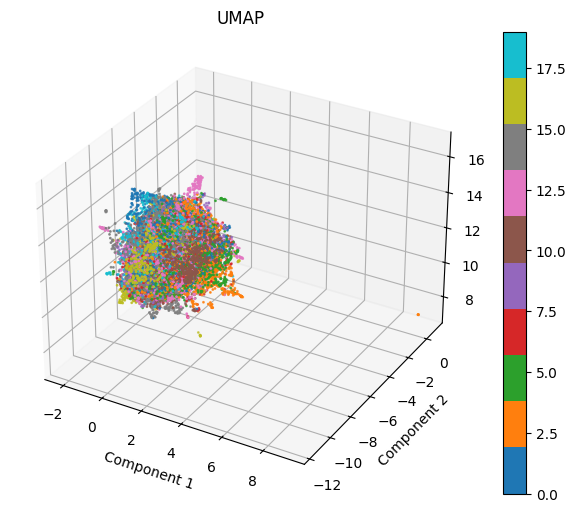

In [21]:
plot_embedding_3d(X_umap_3d, training.target, title="UMAP")

# 🚂🚂 CHOO CHOO

Now we begin the training of shallow models in an attempt to solve the business case, which is classification of forum posts.

Below is a generalized method for training a single classified instance (which all expose the same API) against training + test data sets.

In [22]:
results = {}

def train_and_evaluate(name, classifier_instance, X_train, y_train, X_test, y_test ):
    print(f"Training {name}...")

    start_time = time.time()

    classifier_instance.fit(X_train, y_train)

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.4f} seconds")

    # Predict using the testing data
    y_pred = classifier_instance.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Store the results
    results[name] = {
        "model": classifier_instance,
        "Accuracy": accuracy,
        "Training Time": training_time,
    }

Using the dimensionality reduction techniques and visualizations, we saw some clustering of the data points. To further explore this we selected the kNeighborsClassifier as a starting point for an unsupervised, shallow learning model.

Below we import and then evaluate kNeighborsClassifier.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

In [25]:
train_and_evaluate(
    "K-Nearest Neighbors",
    KNeighborsClassifier(n_neighbors=5, weights="uniform"),
    training.data,
    training.target,
    test.data,
    test.target,
)

Training K-Nearest Neighbors...
Training time: 0.0048 seconds


Accuracy: 0.4084


Training K-Nearest Neighbors...
Training time: 0.0110 seconds
Accuracy: 0.4084

Our initial efforts, were mildly successful but underwhelming. Complete random chance would have us selecting a correct result 5% of the time, here we are landing at approximately 40.8%.

We are electing to run each of these classifiers in a loop for convenience and immediate comparison.

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

*DANGER ZONE* (we messed up kinda)
- When you make a cell that runs many models,  you have to re-run them all when you just want to tweak one. 
- For time sake, probably better to do initial tests on a smaller subset of data so you don't waste time getting initial benchmarks on huge amounts of data

In [29]:
logisticRegression = LogisticRegression(
    max_iter=10000, solver="lbfgs", multi_class="multinomial"
)
mLPClassifier = MLPClassifier(max_iter=5)

svc = SVC()

classifiers = [
    {"name": "logisticRegression", "instance": logisticRegression},
    {"name": "mLPClassifier", "instance": mLPClassifier},
    {"name": "svc", "instance": svc}
]

In [30]:
for classifier in classifiers:
  train_and_evaluate(
    classifier["name"],
    classifier["instance"],
    training.data,
    training.target,
    test.data,
    test.target,
)

Training logisticRegression...


Training time: 22.3172 seconds
Accuracy: 0.7257
Training mLPClassifier...


/Users/nrog/.local/share/virtualenvs/BigBrainTeam-ySEiIZqy/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Training time: 51.1794 seconds
Accuracy: 0.8395
Training svc...
Training time: 122.2735 seconds
Accuracy: 0.7447


## Continued Evaluation of models

After initial evalution of Logistic Regression, mLPC and svc - we found that mLPClassifier was the most accurate, while Logistic Regression was the fastest to train and tune.

To further investigate we enhanced our train and evaluate boilerplate function with a confusion matrix and additional metric. Which initially did its job (confusing us) but eventually helped us choose an appropriate classifier to tune.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [35]:
confused_results = {}


def train_and_evaluate_with_confusion(name, classifier_instance, X_train, y_train, X_test, y_test ):
    print(f"Training {name}...")

    start_time = time.time()

    classifier_instance.fit(X_train, y_train)

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.4f} seconds")

    # Predict using the testing data
    y_pred = classifier_instance.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")

    # Assuming y_true and y_pred are your true labels and predicted labels respectively
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

    # Store the results
    confused_results[name] = {
        "model": classifier_instance,
        "Accuracy": accuracy,
        "Training Time": training_time,
    }

### Logisic Regression

Training logisticRegression...


Training time: 24.0149 seconds
Accuracy: 0.7257
Precision: 0.7273


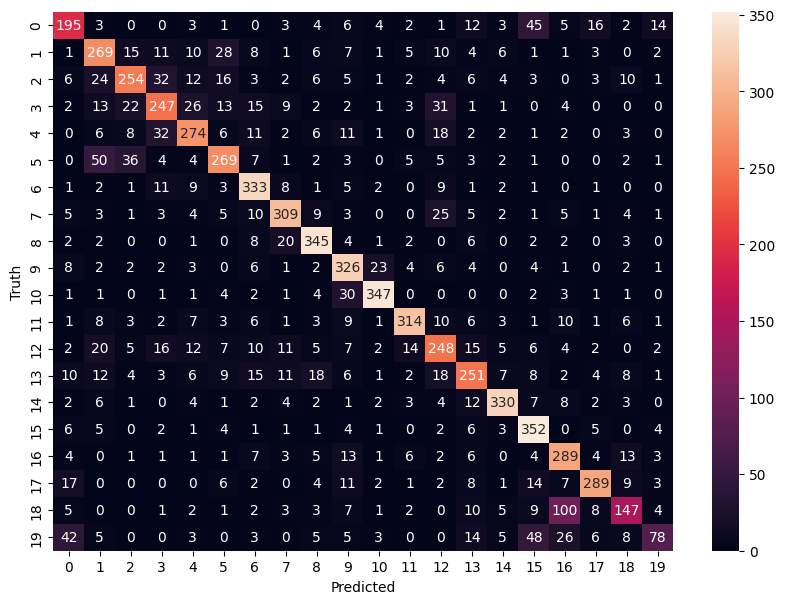

In [36]:
train_and_evaluate_with_confusion(
  "logisticRegression",
  logisticRegression,
  training.data,
  training.target,
  test.data,
  test.target,
)

Training K-Nearest Neighbors...
Training time: 0.0039 seconds


Accuracy: 0.4084
Precision: 0.4892


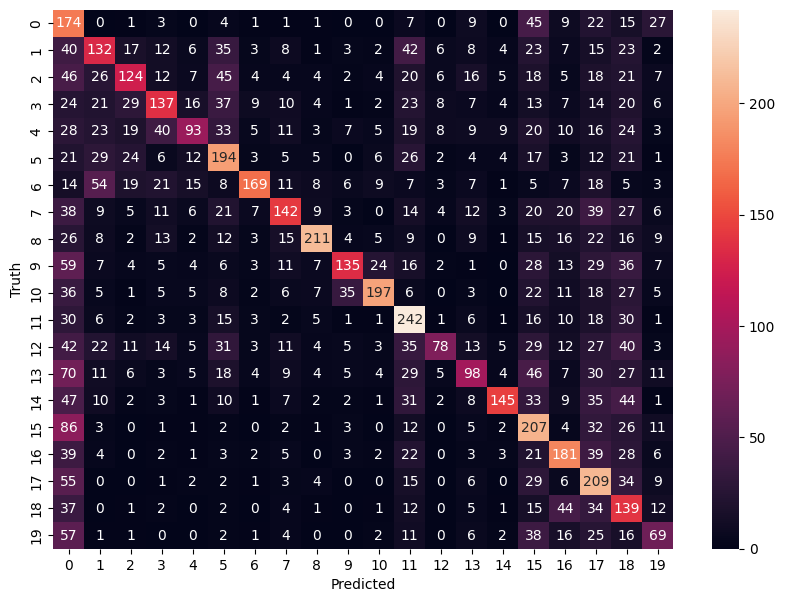

In [37]:
train_and_evaluate_with_confusion(
    "K-Nearest Neighbors",
    KNeighborsClassifier(n_neighbors=5, weights="uniform"),
    training.data,
    training.target,
    test.data,
    test.target,
)

Training svc...


Training time: 123.6668 seconds
Accuracy: 0.7447
Precision: 0.7539


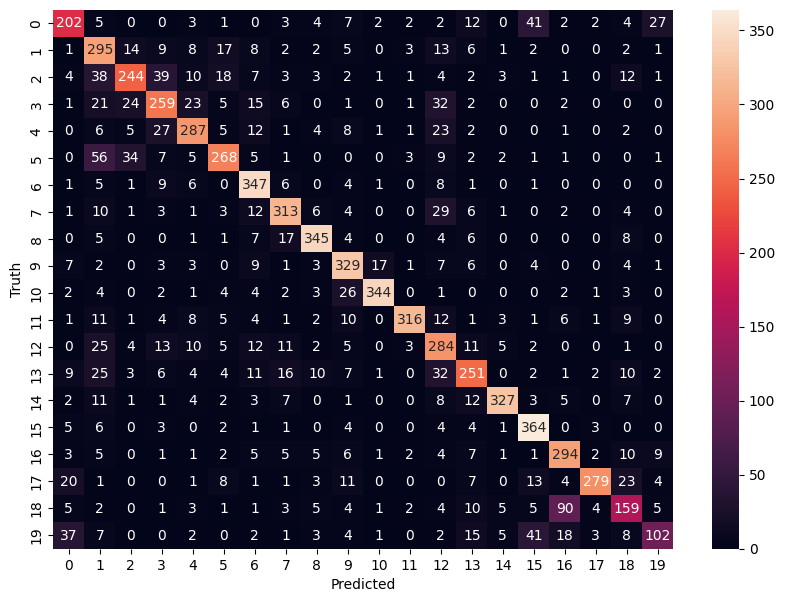

In [38]:
train_and_evaluate_with_confusion(
  "svc",
  svc,
  training.data,
  training.target,
  test.data,
  test.target,
)

*Notes on model performance:*

Logistic regression and SVC had similar accuracy and precisions. We found that there are some consistent false positives in both Logistic regression and SVC model predictions using the accuracy values and precision values.  At this current stage in the project, we have trained three shallow learning models (kNeighbors, SVC, and Logistic Regression) and one deep learning model (MLP)

## Moving Forward with Logistic Regression Classifier

We decided to go with logisticRegression because of the balance between accuracy and speed. While you might ask - wait why not optimize for accuracy? We had a discussion about our learning goals and agreed we would learn more quickly with a shorter iteration cycle.

Now we will do some hyperparameter fine tuning explore the learning curve.

### Hyperparameter Fine Tuning for logisic regression

In [42]:
from sklearn.model_selection import GridSearchCV

*DANGER ZONE*

Our first attempt at training the models with Grid Search led to a failure

Our next attempt will include less parameters in our model training (Test C and Solver) 

In [40]:
# We generated this param_grid by looking at the docs for hours... pain staking!!!
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

print("DON'T RUN ME, DANGER ZONE!")
assert False

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=3,  # Use 3 folds in cross validation
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1,
)

grid_search.fit(
  training.data,
  training.target
)

DON'T RUN ME, DANGER ZONE!


AssertionError: 

First param_grid attempt:
- Fitting 3 folds for each of 720 candidates, totalling 2160 fits

The run had the following results:
- Crashed after 3 hours 💀


#### Adjusted Grid Search

We identified that C and solver were the parameters most likely to have a large impact on model performance. Knowing this, we included those parameters as the only elements in our grid search.

We elected to use "neg_mean_absolute_error" because that is what was used in the lab.

<details>
  <summary>neg_mean_absolute_error </summary>
  neg_mean_absolute_error is a scoring parameter used in various functions in scikit-learn library in Python. It stands for Negative Mean Absolute Error.

  Mean Absolute Error (MAE) is a measure of errors between paired observations expressing the same phenomenon. It's an average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were.

  However, scikit-learn's cross-validation framework expects a utility function (greater is better) rather than a cost function (lower is better), so the MAE is negated to be used in scikit-learn's cross-validation methods, hence the term neg_mean_absolute_error.

  In simple terms, the model will be trained to achieve the maximum neg_mean_absolute_error, which is equivalent to achieving the minimum Mean Absolute Error.
</details>


In [43]:
# We generated this param_grid by looking at the docs for hours... pain staking!!!
param_grid_modified = {
    'C': [0.01, 100],
    'solver': ['liblinear', 'saga'],
}

grid_search_modified = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_modified,
    cv=3,  # Use 3 folds in cross validation
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1,
)

grid_search_modified.fit(
  training.data,
  training.target
)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[CV] END ................................C=0.01, solver=saga; total time=   4.7s
[CV] END ................................C=0.01, solver=saga; total time=   4.8s
[CV] END ...........................C=0.01, solver=liblinear; total time=   5.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   5.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   5.2s
[CV] END ................................C=0.01, solver=saga; total time=   5.4s
[CV] END ............................C=100, solver=liblinear; total time=  15.5s
[CV] END ............................C=100, solver=liblinear; total time=  15.7s
[CV] END ............................C=100, solver=liblinear; total time=  16.0s


/Users/nrog/.local/share/virtualenvs/BigBrainTeam-ySEiIZqy/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=100, solver=saga; total time=  17.6s


/Users/nrog/.local/share/virtualenvs/BigBrainTeam-ySEiIZqy/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nrog/.local/share/virtualenvs/BigBrainTeam-ySEiIZqy/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=100, solver=saga; total time=  14.4s
[CV] END .................................C=100, solver=saga; total time=  14.4s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 100], 'solver': ['liblinear', 'saga']},
             scoring='neg_mean_absolute_error', verbose=2)

In [44]:
best_parameters = grid_search_modified.best_params_

print(f"Best parameters: {best_parameters}")

best_model = LogisticRegression(**best_parameters)

Best parameters: {'C': 100, 'solver': 'liblinear'}


And so we have our result! This is the best performing result from our initial attempt at tuning. Now to go deeper 🤿

In [48]:
# Get the top N parameter combinations
top_n_results = grid_search_modified.cv_results_
top_n_indices = top_n_results["rank_test_score"].argsort()[:3]
worst_n_indices = top_n_results["rank_test_score"].argsort()[-3:][::-1]

# Print the top N parameter combinations and their performance
print("BEST")
for index in top_n_indices:
  params = top_n_results["params"][index]
  mean_score = top_n_results["mean_test_score"][index]
  std_score = top_n_results["std_test_score"][index]
  print(f"Parameters: {params}")
  print(f"Mean Score: {mean_score:.4f} (±{std_score:.4f})")
  print()

BEST
Parameters: {'C': 100, 'solver': 'liblinear'}
Mean Score: -0.5945 (±0.0327)

Parameters: {'C': 100, 'solver': 'saga'}
Mean Score: -0.6430 (±0.0315)

Parameters: {'C': 0.01, 'solver': 'saga'}
Mean Score: -3.5701 (±0.0272)

WORST
Parameters: {'C': 0.01, 'solver': 'liblinear'}
Mean Score: -3.6631 (±0.0669)

Parameters: {'C': 0.01, 'solver': 'saga'}
Mean Score: -3.5701 (±0.0272)

Parameters: {'C': 100, 'solver': 'saga'}
Mean Score: -0.6430 (±0.0315)



## Result of second parameter Grid Search after simplifying the parameters (C) and (Solver)
#param_grid_modified = {
    'C': [0.01, 100],
    'solver': ['liblinear', 'saga'],
}
#Results: Best parameters: {'C': 100, 'solver': 'liblinear'}

Testing the updated LogisticRegression with modified parameters

Training hyper_tuned_logistic_regression...


Training time: 22.6318 seconds
Accuracy: 0.8176
Precision: 0.8188


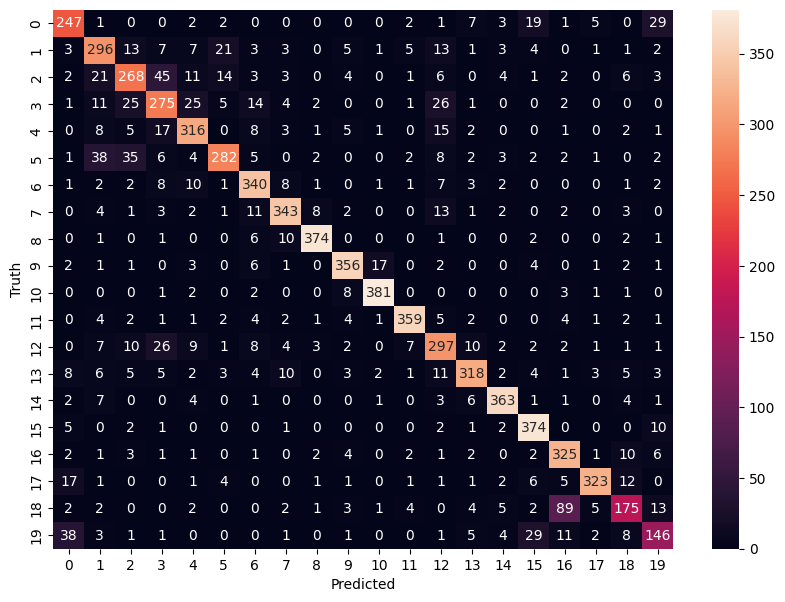

In [49]:
train_and_evaluate_with_confusion(
  "hyper_tuned_logistic_regression",
  best_model,
  training.data,
  training.target,
  test.data,
  test.target,
)

### 🧑‍🍳 (Let us cook)

Wow, look who's doing machine learning now. Note the results with our original logisticRegression run and then THE IMPROVED RESULTS with our grid search outputted params.

**Original Logistic Regression Results with "Vanilla" Parameters:**  

  Training logisticRegression...  
  Training time: 37.0675 seconds  
  Accuracy: 0.7257  
  Precision: 0.7273  
 

**Modified Logistic Regression Results with "Improved" Parameters:**  

  parameters: {'C': 100, 'solver': 'liblinear'}  
  Training hyper_tuned_logistic_regression...  
  Training time: 28.0878 seconds  
  Accuracy: 0.8176  
  Precision: 0.8188  

### HyperParameter tuning attempt 2  

At this point in time, we tried to adopt an observation -> hypothesis -> experiment approach to future tuning rounds.

Observation: It appears that 100 C was significantly better than 0.01 C.

Hypothesis: The C parameter will have a positive and outsized impact on model performance

Experiment: Below we increase the number of C from 100 to 1000 and review the results of the trained model. We also limited the Solvers from liblinear and saga to just liblinear.  




In [51]:
param_grid_modified_2 = {
    'C': [100, 200, 1000],
    'solver': ['liblinear'],
}

grid_search_modified_2 = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_modified_2,
    cv=3,  # Use 3 folds in cross validation
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1,
)

grid_search_modified_2.fit(
  training.data,
  training.target
)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ............................C=100, solver=liblinear; total time=  20.4s
[CV] END ............................C=100, solver=liblinear; total time=  21.0s
[CV] END ............................C=100, solver=liblinear; total time=  21.1s
[CV] END ............................C=200, solver=liblinear; total time=  21.5s
[CV] END ............................C=200, solver=liblinear; total time=  21.6s
[CV] END ............................C=200, solver=liblinear; total time=  22.3s
[CV] END ...........................C=1000, solver=liblinear; total time=  22.9s
[CV] END ...........................C=1000, solver=liblinear; total time=  23.2s
[CV] END ...........................C=1000, solver=liblinear; total time=  23.3s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 200, 1000], 'solver': ['liblinear']},
             scoring='neg_mean_absolute_error', verbose=2)

In [54]:
# Get the top N parameter combinations
top_n_results = grid_search_modified_2.cv_results_
top_n_indices = top_n_results["rank_test_score"].argsort()[:3]
worst_n_indices = top_n_results["rank_test_score"].argsort()[-3:][::-1]

# Print the top N parameter combinations and their performance
print("BEST")
for index in top_n_indices:
  params = top_n_results["params"][index]
  mean_score = top_n_results["mean_test_score"][index]
  std_score = top_n_results["std_test_score"][index]
  print(f"Parameters: {params}")
  print(f"Mean Score: {mean_score:.4f} (±{std_score:.4f})")
  print()

BEST
Parameters: {'C': 1000, 'solver': 'liblinear'}
Mean Score: -0.5640 (±0.0244)

Parameters: {'C': 200, 'solver': 'liblinear'}
Mean Score: -0.5783 (±0.0222)

Parameters: {'C': 100, 'solver': 'liblinear'}
Mean Score: -0.5945 (±0.0327)



From these results we observed diminishing returns 

In [50]:
train_and_evaluate_with_confusion(
  "hyper_tuned_logistic_regression_2",
  best_model_2,
  training.data,
  training.target,
  test.data,
  test.target,
)

NameError: name 'best_model_2' is not defined

### CONCLUSION

We improved our vanilla LogisticRegression model from 71% accuracy to 82% with very minor increases in time to train.  

That's a 11% increase!  

Obviously lots of further investigation to do, but for now we're happy with the results and moving onto to doing our own vectorization